In [1]:
! pip install mlxtend --upgrade

In [2]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", None)

In [3]:
Sex = ["M", "F"]

Smoke = ["NS", "ES", "SM"]

occupation_category = [
    "Housewife",
    "Manufacturing",
    "Construction",
    "Other",
    "Office",
    "Education",
    "Finance",
    "Unemployed",
    "Service Industry",
    "Agriculture",
    "Healthcare",
    "Transportation",
]
occupation_label = [5, 6, 1, 8, 7, 2, 3, 11, 9, 0, 4, 10]


Occupation = {
    "Housewife": 5,
    "Manufacturing": 6,
    "Construction": 1,
    "Other": 8,
    "Office": 7,
    "Education": 2,
    "Finance": 3,
    "Unemployed": 11,
    "Service Industry": 9,
    "Agriculture": 0,
    "Healthcare": 4,
    "Transportation": 10,
}

In [4]:
data = pd.read_csv("data/translated_new_binned_DropNaN.csv")
print(f"data.columns = {list(data.columns)}")

display(data)

data.columns = ['Patient_ID', 'Age', 'Sex', 'Smoke', 'Smoke_amount', 'Height', 'Weight', 'BMI', 'BSA', 'occupation_category', 'occupation_label', 'A_20th_quantile_binned', 'A_25th_quantile_binned', 'A_50th_quantile_binned', 'A_75th_quantile_binned', 'A_max_binned', 'A_mean_binned', 'A_median_binned', 'A_min_binned', 'A_std_binned', 'M_20th_quantile_binned', 'M_25th_quantile_binned', 'M_50th_quantile_binned', 'M_75th_quantile_binned', 'M_max_binned', 'M_mean_binned', 'M_median_binned', 'M_min_binned', 'M_std_binned']


,Patient_ID,Age,Sex,Smoke,Smoke_amount,Height,Weight,BMI,BSA,occupation_category,occupation_label,A_20th_quantile_binned,A_25th_quantile_binned,A_50th_quantile_binned,A_75th_quantile_binned,A_max_binned,A_mean_binned,A_median_binned,A_min_binned,A_std_binned,M_20th_quantile_binned,M_25th_quantile_binned,M_50th_quantile_binned,M_75th_quantile_binned,M_max_binned,M_mean_binned,M_median_binned,M_min_binned,M_std_binned
0,SB-001,43,M,NS,0,156,76,31.229454,1.814754,Housewife,5,A_20th_quantile_Q2,A_25th_quantile_Q2,A_50th_quantile_Q2,A_75th_quantile_Q2,A_max_Q1,A_mean_Q1,A_median_Q2,A_min_Q2,A_std_Q1,M_20th_quantile_Q2,M_25th_quantile_Q2,M_50th_quantile_Q2,M_75th_quantile_Q2,M_max_Q1,M_mean_Q2,M_median_Q2,M_min_Q1,M_std_Q1
1,SB-003,61,M,ES,20,173,67,22.386314,1.794358,Construction,1,A_20th_quantile_Q3,A_25th_quantile_Q3,A_50th_quantile_Q3,A_75th_quantile_Q3,A_max_Q1,A_mean_Q2,A_median_Q3,A_min_Q4,A_std_Q1,M_20th_quantile_Q3,M_25th_quantile_Q3,M_50th_quantile_Q3,M_75th_quantile_Q3,M_max_Q1,M_mean_Q3,M_median_Q3,M_min_Q3,M_std_Q1
2,SB-004,49,M,NS,0,142,51,25.292601,1.418332,Housewife,5,A_20th_quantile_Q2,A_25th_quantile_Q2,A_50th_quantile_Q2,A_75th_quantile_Q2,A_max_Q1,A_mean_Q1,A_median_Q2,A_min_Q2,A_std_Q1,M_20th_quantile_Q2,M_25th_quantile_Q2,M_50th_quantile_Q2,M_75th_quantile_Q2,M_max_Q1,M_mean_Q2,M_median_Q2,M_min_Q2,M_std_Q1
3,SB-006,64,M,ES,17,172,80,27.041644,1.955050,Manufacturing,6,A_20th_quantile_Q3,A_25th_quantile_Q3,A_50th_quantile_Q3,A_75th_quantile_Q3,A_max_Q1,A_mean_Q2,A_median_Q3,A_min_Q1,A_std_Q1,M_20th_quantile_Q3,M_25th_quantile_Q3,M_50th_quantile_Q3,M_75th_quantile_Q3,M_max_Q1,M_mean_Q3,M_median_Q3,M_min_Q3,M_std_Q1
4,SB-007,46,M,NS,0,155,52,21.644121,1.496292,Housewife,5,A_20th_quantile_Q2,A_25th_quantile_Q2,A_50th_quantile_Q2,A_75th_quantile_Q2,A_max_Q1,A_mean_Q1,A_median_Q2,A_min_Q1,A_std_Q1,M_20th_quantile_Q2,M_25th_quantile_Q2,M_50th_quantile_Q2,M_75th_quantile_Q2,M_max_Q1,M_mean_Q2,M_median_Q2,M_min_Q1,M_std_Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,SB-117,61,F,NS,0,155,58,24.141519,1.580260,Housewife,5,A_20th_quantile_Q2,A_25th_quantile_Q2,A_50th_quantile_Q2,A_75th_quantile_Q2,A_max_Q1,A_mean_Q1,A_median_Q2,A_min_Q1,A_std_Q1,M_20th_quantile_Q1,M_25th_quantile_Q2,M_50th_quantile_Q2,M_75th_quantile_Q2,M_max_Q1,M_mean_Q2,M_median_Q2,M_min_Q1,M_std_Q2
82,SB-118,82,F,NS,0,153,52,22.213679,1.486607,Service Industry,9,A_20th_quantile_Q2,A_25th_quantile_Q2,A_50th_quantile_Q2,A_75th_quantile_Q2,A_max_Q1,A_mean_Q1,A_median_Q2,A_min_Q3,A_std_Q1,M_20th_quantile_Q2,M_25th_quantile_Q2,M_50th_quantile_Q2,M_75th_quantile_Q2,M_max_Q1,M_mean_Q2,M_median_Q2,M_min_Q2,M_std_Q1
83,SB-119,69,F,NS,0,158,67,26.838648,1.714805,Housewife,5,A_20th_quantile_Q2,A_25th_quantile_Q2,A_50th_quantile_Q2,A_75th_quantile_Q2,A_max_Q1,A_mean_Q1,A_median_Q2,A_min_Q2,A_std_Q1,M_20th_quantile_Q2,M_25th_quantile_Q2,M_50th_quantile_Q2,M_75th_quantile_Q2,M_max_Q1,M_mean_Q2,M_median_Q2,M_min_Q2,M_std_Q1
84,SB-121,61,F,SM,5,157,58,23.530366,1.590423,Housewife,5,A_20th_quantile_Q3,A_25th_quantile_Q3,A_50th_quantile_Q2,A_75th_quantile_Q2,A_max_Q1,A_mean_Q1,A_median_Q2,A_min_Q2,A_std_Q1,M_20th_quantile_Q3,M_25th_quantile_Q3,M_50th_quantile_Q2,M_75th_quantile_Q2,M_max_Q1,M_mean_Q2,M_median_Q2,M_min_Q2,M_std_Q1


In [5]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
from scipy import sparse


# Data preprocessing (same as before)
def categorize_age(age):
    if age < 30:
        return "Young"
    elif 30 <= age < 60:
        return "Middle-aged"
    else:
        return "Senior"


def categorize_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Normal"
    elif 25 <= bmi < 30:
        return "Overweight"
    else:
        return "Obese"


def categorize_bsa(bsa):
    if bsa < 1.5:
        return "Small"
    elif 1.5 <= bsa < 1.8:
        return "Medium"
    else:
        return "Large"


# Apply categorizations
data["Age_Category"] = data["Age"].apply(categorize_age)
data["BMI_Category"] = data["BMI"].apply(categorize_bmi)
data["BSA_Category"] = data["BSA"].apply(categorize_bsa)

# Create binary columns for each category
columns_to_encode = [
    "Age_Category",
    "Sex",
    "Smoke",
    "BMI_Category",
    "BSA_Category",
    "occupation_category",
    # "A_20th_quantile_binned",
    # "A_25th_quantile_binned",
    # "A_50th_quantile_binned",
    # "A_75th_quantile_binned",
    # "A_max_binned",
    # "A_mean_binned",
    # "A_median_binned",
    # "A_min_binned",
    # "A_std_binned",
    "M_20th_quantile_binned",
    "M_25th_quantile_binned",
    "M_50th_quantile_binned",
    "M_75th_quantile_binned",
    "M_max_binned",
    "M_mean_binned",
    "M_median_binned",
    "M_min_binned",
    "M_std_binned",
]

encoded_data = pd.get_dummies(data[columns_to_encode], prefix=columns_to_encode)

# Convert to boolean type
encoded_data = encoded_data.astype(bool)

In [6]:
def run_apriori(data, min_support, min_confidence, min_lift=1):
    frequent_itemsets = apriori(
        data, min_support=min_support, use_colnames=True, low_memory=True
    )
    rules = association_rules(
        frequent_itemsets, metric="confidence", min_threshold=min_confidence
    )
    rules = rules[rules["lift"] >= min_lift]
    return rules.sort_values("lift", ascending=False)


def experiment_with_thresholds(data, support_thresholds, confidence_thresholds):
    results = []
    for support in support_thresholds:
        for confidence in confidence_thresholds:
            rules = run_apriori(data, support, confidence)
            results.append(
                {
                    "min_support": support,
                    "min_confidence": confidence,
                    "num_rules": len(rules),
                    "top_rules": rules.head(5) if len(rules) > 0 else pd.DataFrame(),
                }
            )
    return results


def run_apriori_in_batches(
    data, support_thresholds, confidence_thresholds, batch_size=1000
):
    results = []
    for i in range(0, len(data), batch_size):
        batch = data.iloc[i : i + batch_size]
        batch_results = experiment_with_thresholds(
            batch, support_thresholds, confidence_thresholds
        )
        results.extend(batch_results)
        print(f"Processed batch {i//batch_size + 1}")
    return results

Processed batch 1

Min Support: 0.05, Min Confidence: 0.5
Number of rules generated: 6810866
Top 5 rules:


,antecedents,consequents,support,confidence,lift
2337204,"(M_median_binned_M_median_Q2, M_75th_quantile_...","(Sex_F, M_25th_quantile_binned_M_25th_quantile...",0.05814,1.000000,14.333333
2337202,"(M_median_binned_M_median_Q2, M_75th_quantile_...","(M_20th_quantile_binned_M_20th_quantile_Q3, Se...",0.05814,1.000000,14.333333
2337194,"(M_median_binned_M_median_Q2, M_75th_quantile_...","(Smoke_NS, M_25th_quantile_binned_M_25th_quant...",0.05814,0.833333,14.333333
2337193,"(M_median_binned_M_median_Q2, M_75th_quantile_...","(M_20th_quantile_binned_M_20th_quantile_Q3, Sm...",0.05814,0.833333,14.333333
5400022,"(M_median_binned_M_median_Q2, M_mean_binned_M_...","(BSA_Category_Medium, M_max_binned_M_max_Q1, S...",0.05814,0.833333,14.333333



Min Support: 0.05, Min Confidence: 0.7
Number of rules generated: 3982430
Top 5 rules:


,antecedents,consequents,support,confidence,lift
3736951,"(M_median_binned_M_median_Q2, BSA_Category_Med...","(M_75th_quantile_binned_M_75th_quantile_Q2, Se...",0.05814,1.000000,14.333333
3736935,"(M_median_binned_M_median_Q2, BSA_Category_Med...","(M_max_binned_M_max_Q1, Sex_F, M_25th_quantile...",0.05814,1.000000,14.333333
3736940,"(M_median_binned_M_median_Q2, BSA_Category_Med...","(M_75th_quantile_binned_M_75th_quantile_Q2, M_...",0.05814,1.000000,14.333333
3736971,"(M_median_binned_M_median_Q2, BSA_Category_Med...","(BMI_Category_Normal, M_mean_binned_M_mean_Q2,...",0.05814,0.833333,14.333333
3736979,"(M_median_binned_M_median_Q2, BSA_Category_Med...","(BMI_Category_Normal, Sex_F, M_20th_quantile_b...",0.05814,0.833333,14.333333



Min Support: 0.05, Min Confidence: 0.75
Number of rules generated: 3212286
Top 5 rules:


,antecedents,consequents,support,confidence,lift
1187735,"(M_75th_quantile_binned_M_75th_quantile_Q2, M_...","(M_mean_binned_M_mean_Q2, BSA_Category_Medium,...",0.069767,1.0,14.333333
1187738,"(M_75th_quantile_binned_M_75th_quantile_Q2, M_...","(M_20th_quantile_binned_M_20th_quantile_Q3, BS...",0.069767,1.0,14.333333
1187678,"(M_median_binned_M_median_Q2, BSA_Category_Med...","(M_mean_binned_M_mean_Q2, M_25th_quantile_binn...",0.069767,1.0,14.333333
1187707,"(BSA_Category_Medium, M_75th_quantile_binned_M...","(M_20th_quantile_binned_M_20th_quantile_Q3, M_...",0.069767,1.0,14.333333
1187709,"(BSA_Category_Medium, M_75th_quantile_binned_M...","(M_median_binned_M_median_Q2, M_mean_binned_M_...",0.069767,1.0,14.333333



Min Support: 0.05, Min Confidence: 0.9
Number of rules generated: 1292638
Top 5 rules:


,antecedents,consequents,support,confidence,lift
1072604,"(M_median_binned_M_median_Q2, M_75th_quantile_...","(M_max_binned_M_max_Q1, Sex_F, M_25th_quantile...",0.05814,1.0,14.333333
1072684,"(M_median_binned_M_median_Q2, Smoke_NS, M_25th...","(M_75th_quantile_binned_M_75th_quantile_Q2, M_...",0.05814,1.0,14.333333
1072657,"(M_std_binned_M_std_Q1, M_25th_quantile_binned...","(M_median_binned_M_median_Q2, M_75th_quantile_...",0.05814,1.0,14.333333
1072619,"(M_median_binned_M_median_Q2, Sex_F, M_std_bin...","(M_75th_quantile_binned_M_75th_quantile_Q2, M_...",0.05814,1.0,14.333333
1072686,"(Smoke_NS, M_25th_quantile_binned_M_25th_quant...","(M_median_binned_M_median_Q2, M_75th_quantile_...",0.05814,1.0,14.333333



Min Support: 0.1, Min Confidence: 0.5
Number of rules generated: 1953512
Top 5 rules:


,antecedents,consequents,support,confidence,lift
187740,"(M_20th_quantile_binned_M_20th_quantile_Q3, M_...","(M_75th_quantile_binned_M_75th_quantile_Q2, M_...",0.104651,1.0,8.6
55814,"(M_75th_quantile_binned_M_75th_quantile_Q2, Se...","(M_mean_binned_M_mean_Q2, M_25th_quantile_binn...",0.104651,0.9,8.6
187722,"(M_75th_quantile_binned_M_75th_quantile_Q2, Se...","(M_20th_quantile_binned_M_20th_quantile_Q3, M_...",0.104651,0.9,8.6
466050,"(M_max_binned_M_max_Q1, M_mean_binned_M_mean_Q...","(M_75th_quantile_binned_M_75th_quantile_Q2, Se...",0.104651,1.0,8.6
466084,"(M_20th_quantile_binned_M_20th_quantile_Q3, M_...","(M_75th_quantile_binned_M_75th_quantile_Q2, M_...",0.104651,1.0,8.6



Min Support: 0.1, Min Confidence: 0.7
Number of rules generated: 932796
Top 5 rules:


,antecedents,consequents,support,confidence,lift
239024,"(M_75th_quantile_binned_M_75th_quantile_Q2, Se...","(M_max_binned_M_max_Q1, M_mean_binned_M_mean_Q...",0.104651,0.9,8.6
100391,"(M_75th_quantile_binned_M_75th_quantile_Q2, M_...","(M_20th_quantile_binned_M_20th_quantile_Q3, M_...",0.104651,0.9,8.6
100413,"(M_20th_quantile_binned_M_20th_quantile_Q3, M_...","(M_75th_quantile_binned_M_75th_quantile_Q2, M_...",0.104651,1.0,8.6
31143,"(M_75th_quantile_binned_M_75th_quantile_Q2, Se...","(M_20th_quantile_binned_M_20th_quantile_Q3, M_...",0.104651,0.9,8.6
100407,"(M_max_binned_M_max_Q1, M_mean_binned_M_mean_Q...","(M_75th_quantile_binned_M_75th_quantile_Q2, Se...",0.104651,1.0,8.6



Min Support: 0.1, Min Confidence: 0.75
Number of rules generated: 786234
Top 5 rules:


,antecedents,consequents,support,confidence,lift
85770,"(M_20th_quantile_binned_M_20th_quantile_Q3, M_...","(M_75th_quantile_binned_M_75th_quantile_Q2, Se...",0.104651,1.0,8.6
85748,"(M_75th_quantile_binned_M_75th_quantile_Q2, Se...","(M_20th_quantile_binned_M_20th_quantile_Q3, M_...",0.104651,0.9,8.6
85749,"(M_75th_quantile_binned_M_75th_quantile_Q2, Se...","(M_mean_binned_M_mean_Q2, M_25th_quantile_binn...",0.104651,0.9,8.6
26409,"(M_75th_quantile_binned_M_75th_quantile_Q2, Se...","(M_mean_binned_M_mean_Q2, M_25th_quantile_binn...",0.104651,0.9,8.6
85718,"(M_20th_quantile_binned_M_20th_quantile_Q3, M_...","(M_75th_quantile_binned_M_75th_quantile_Q2, M_...",0.104651,1.0,8.6



Min Support: 0.1, Min Confidence: 0.9
Number of rules generated: 350916
Top 5 rules:


,antecedents,consequents,support,confidence,lift
40968,"(M_20th_quantile_binned_M_20th_quantile_Q3, M_...","(M_75th_quantile_binned_M_75th_quantile_Q2, Se...",0.104651,1.0,8.6
40967,"(M_mean_binned_M_mean_Q2, M_25th_quantile_binn...","(M_75th_quantile_binned_M_75th_quantile_Q2, Se...",0.104651,1.0,8.6
40928,"(M_20th_quantile_binned_M_20th_quantile_Q3, M_...","(M_75th_quantile_binned_M_75th_quantile_Q2, M_...",0.104651,1.0,8.6
40965,"(M_20th_quantile_binned_M_20th_quantile_Q3, M_...","(M_75th_quantile_binned_M_75th_quantile_Q2, Se...",0.104651,1.0,8.6
40964,"(M_mean_binned_M_mean_Q2, M_std_binned_M_std_Q...","(M_75th_quantile_binned_M_75th_quantile_Q2, Se...",0.104651,1.0,8.6



Min Support: 0.15, Min Confidence: 0.5
Number of rules generated: 926618
Top 5 rules:


,antecedents,consequents,support,confidence,lift
2482,"(M_max_binned_M_max_Q1, M_20th_quantile_binned...",(M_25th_quantile_binned_M_25th_quantile_Q4),0.162791,1.0,6.142857
2484,(M_25th_quantile_binned_M_25th_quantile_Q4),"(M_max_binned_M_max_Q1, M_20th_quantile_binned...",0.162791,1.0,6.142857
2485,(M_20th_quantile_binned_M_20th_quantile_Q4),"(M_max_binned_M_max_Q1, M_25th_quantile_binned...",0.162791,1.0,6.142857
200,(M_25th_quantile_binned_M_25th_quantile_Q4),(M_20th_quantile_binned_M_20th_quantile_Q4),0.162791,1.0,6.142857
2481,"(M_max_binned_M_max_Q1, M_25th_quantile_binned...",(M_20th_quantile_binned_M_20th_quantile_Q4),0.162791,1.0,6.142857



Min Support: 0.15, Min Confidence: 0.7
Number of rules generated: 434869
Top 5 rules:


,antecedents,consequents,support,confidence,lift
1416,(M_25th_quantile_binned_M_25th_quantile_Q4),"(M_max_binned_M_max_Q1, M_20th_quantile_binned...",0.162791,1.0,6.142857
111,(M_20th_quantile_binned_M_20th_quantile_Q4),(M_25th_quantile_binned_M_25th_quantile_Q4),0.162791,1.0,6.142857
110,(M_25th_quantile_binned_M_25th_quantile_Q4),(M_20th_quantile_binned_M_20th_quantile_Q4),0.162791,1.0,6.142857
1414,"(M_max_binned_M_max_Q1, M_20th_quantile_binned...",(M_25th_quantile_binned_M_25th_quantile_Q4),0.162791,1.0,6.142857
1413,"(M_max_binned_M_max_Q1, M_25th_quantile_binned...",(M_20th_quantile_binned_M_20th_quantile_Q4),0.162791,1.0,6.142857



Min Support: 0.15, Min Confidence: 0.75
Number of rules generated: 355047
Top 5 rules:


,antecedents,consequents,support,confidence,lift
76,(M_20th_quantile_binned_M_20th_quantile_Q4),(M_25th_quantile_binned_M_25th_quantile_Q4),0.162791,1.0,6.142857
1138,"(M_max_binned_M_max_Q1, M_25th_quantile_binned...",(M_20th_quantile_binned_M_20th_quantile_Q4),0.162791,1.0,6.142857
1139,"(M_max_binned_M_max_Q1, M_20th_quantile_binned...",(M_25th_quantile_binned_M_25th_quantile_Q4),0.162791,1.0,6.142857
1141,(M_25th_quantile_binned_M_25th_quantile_Q4),"(M_max_binned_M_max_Q1, M_20th_quantile_binned...",0.162791,1.0,6.142857
75,(M_25th_quantile_binned_M_25th_quantile_Q4),(M_20th_quantile_binned_M_20th_quantile_Q4),0.162791,1.0,6.142857



Min Support: 0.15, Min Confidence: 0.9
Number of rules generated: 136064
Top 5 rules:


,antecedents,consequents,support,confidence,lift
27,(M_25th_quantile_binned_M_25th_quantile_Q4),(M_20th_quantile_binned_M_20th_quantile_Q4),0.162791,1.0,6.142857
502,"(M_max_binned_M_max_Q1, M_20th_quantile_binned...",(M_25th_quantile_binned_M_25th_quantile_Q4),0.162791,1.0,6.142857
505,(M_20th_quantile_binned_M_20th_quantile_Q4),"(M_max_binned_M_max_Q1, M_25th_quantile_binned...",0.162791,1.0,6.142857
504,(M_25th_quantile_binned_M_25th_quantile_Q4),"(M_max_binned_M_max_Q1, M_20th_quantile_binned...",0.162791,1.0,6.142857
501,"(M_max_binned_M_max_Q1, M_25th_quantile_binned...",(M_20th_quantile_binned_M_20th_quantile_Q4),0.162791,1.0,6.142857



Min Support: 0.2, Min Confidence: 0.5
Number of rules generated: 284472
Top 5 rules:


,antecedents,consequents,support,confidence,lift
41164,"(M_median_binned_M_median_Q3, M_75th_quantile_...","(M_max_binned_M_max_Q1, M_50th_quantile_binned...",0.209302,1.0,4.095238
41155,"(M_max_binned_M_max_Q1, M_median_binned_M_medi...","(M_50th_quantile_binned_M_50th_quantile_Q3, M_...",0.209302,1.0,4.095238
41171,"(M_50th_quantile_binned_M_50th_quantile_Q3, M_...","(M_max_binned_M_max_Q1, M_median_binned_M_medi...",0.209302,1.0,4.095238
11432,"(M_50th_quantile_binned_M_50th_quantile_Q3, M_...","(M_median_binned_M_median_Q3, M_mean_binned_M_...",0.209302,1.0,4.095238
11435,"(M_median_binned_M_median_Q3, M_75th_quantile_...","(M_50th_quantile_binned_M_50th_quantile_Q3, M_...",0.209302,1.0,4.095238



Min Support: 0.2, Min Confidence: 0.7
Number of rules generated: 165082
Top 5 rules:


,antecedents,consequents,support,confidence,lift
6767,"(M_50th_quantile_binned_M_50th_quantile_Q3, M_...","(M_median_binned_M_median_Q3, M_mean_binned_M_...",0.209302,1.0,4.095238
23743,"(M_median_binned_M_median_Q3, M_75th_quantile_...","(M_max_binned_M_max_Q1, M_50th_quantile_binned...",0.209302,1.0,4.095238
23734,"(M_max_binned_M_max_Q1, M_median_binned_M_medi...","(M_50th_quantile_binned_M_50th_quantile_Q3, M_...",0.209302,1.0,4.095238
23750,"(M_50th_quantile_binned_M_50th_quantile_Q3, M_...","(M_max_binned_M_max_Q1, M_median_binned_M_medi...",0.209302,1.0,4.095238
6770,"(M_median_binned_M_median_Q3, M_75th_quantile_...","(M_50th_quantile_binned_M_50th_quantile_Q3, M_...",0.209302,1.0,4.095238



Min Support: 0.2, Min Confidence: 0.75
Number of rules generated: 134689
Top 5 rules:


,antecedents,consequents,support,confidence,lift
19241,"(M_median_binned_M_median_Q3, M_75th_quantile_...","(M_max_binned_M_max_Q1, M_50th_quantile_binned...",0.209302,1.0,4.095238
19232,"(M_max_binned_M_max_Q1, M_median_binned_M_medi...","(M_50th_quantile_binned_M_50th_quantile_Q3, M_...",0.209302,1.0,4.095238
19248,"(M_50th_quantile_binned_M_50th_quantile_Q3, M_...","(M_max_binned_M_max_Q1, M_median_binned_M_medi...",0.209302,1.0,4.095238
19238,"(M_max_binned_M_max_Q1, M_50th_quantile_binned...","(M_median_binned_M_median_Q3, M_mean_binned_M_...",0.209302,1.0,4.095238
5490,"(M_50th_quantile_binned_M_50th_quantile_Q3, M_...","(M_median_binned_M_median_Q3, M_mean_binned_M_...",0.209302,1.0,4.095238



Min Support: 0.2, Min Confidence: 0.9
Number of rules generated: 51942
Top 5 rules:


,antecedents,consequents,support,confidence,lift
8284,"(M_max_binned_M_max_Q1, M_median_binned_M_medi...","(M_50th_quantile_binned_M_50th_quantile_Q3, M_...",0.209302,1.0,4.095238
8288,"(M_max_binned_M_max_Q1, M_50th_quantile_binned...","(M_median_binned_M_median_Q3, M_mean_binned_M_...",0.209302,1.0,4.095238
8292,"(M_50th_quantile_binned_M_50th_quantile_Q3, M_...","(M_max_binned_M_max_Q1, M_median_binned_M_medi...",0.209302,1.0,4.095238
8289,"(M_median_binned_M_median_Q3, M_75th_quantile_...","(M_max_binned_M_max_Q1, M_50th_quantile_binned...",0.209302,1.0,4.095238
2397,"(M_median_binned_M_median_Q3, M_75th_quantile_...","(M_50th_quantile_binned_M_50th_quantile_Q3, M_...",0.209302,1.0,4.095238



Min Support: 0.25, Min Confidence: 0.5
Number of rules generated: 99775
Top 5 rules:


,antecedents,consequents,support,confidence,lift
26461,"(M_20th_quantile_binned_M_20th_quantile_Q3, M_...","(M_median_binned_M_median_Q3, M_25th_quantile_...",0.255814,1.0,3.909091
26454,"(M_20th_quantile_binned_M_20th_quantile_Q3, M_...","(M_50th_quantile_binned_M_50th_quantile_Q3, M_...",0.255814,1.0,3.909091
26453,"(M_max_binned_M_max_Q1, M_median_binned_M_medi...","(M_20th_quantile_binned_M_20th_quantile_Q3, M_...",0.255814,1.0,3.909091
8189,"(M_20th_quantile_binned_M_20th_quantile_Q3, M_...","(M_50th_quantile_binned_M_50th_quantile_Q3, M_...",0.255814,1.0,3.909091
26464,"(M_median_binned_M_median_Q3, M_25th_quantile_...","(M_20th_quantile_binned_M_20th_quantile_Q3, M_...",0.255814,1.0,3.909091



Min Support: 0.25, Min Confidence: 0.7
Number of rules generated: 63339
Top 5 rules:


,antecedents,consequents,support,confidence,lift
16331,"(M_20th_quantile_binned_M_20th_quantile_Q3, M_...","(M_50th_quantile_binned_M_50th_quantile_Q3, M_...",0.255814,1.0,3.909091
16342,"(M_20th_quantile_binned_M_20th_quantile_Q3, M_...","(M_max_binned_M_max_Q1, M_50th_quantile_binned...",0.255814,1.0,3.909091
4943,"(M_median_binned_M_median_Q3, M_25th_quantile_...","(M_20th_quantile_binned_M_20th_quantile_Q3, M_...",0.255814,1.0,3.909091
4939,"(M_20th_quantile_binned_M_20th_quantile_Q3, M_...","(M_50th_quantile_binned_M_50th_quantile_Q3, M_...",0.255814,1.0,3.909091
4942,"(M_50th_quantile_binned_M_50th_quantile_Q3, M_...","(M_20th_quantile_binned_M_20th_quantile_Q3, M_...",0.255814,1.0,3.909091



Min Support: 0.25, Min Confidence: 0.75
Number of rules generated: 53664
Top 5 rules:


,antecedents,consequents,support,confidence,lift
4021,"(M_20th_quantile_binned_M_20th_quantile_Q3, M_...","(M_median_binned_M_median_Q3, M_25th_quantile_...",0.255814,1.0,3.909091
4025,"(M_50th_quantile_binned_M_50th_quantile_Q3, M_...","(M_20th_quantile_binned_M_20th_quantile_Q3, M_...",0.255814,1.0,3.909091
4022,"(M_20th_quantile_binned_M_20th_quantile_Q3, M_...","(M_50th_quantile_binned_M_50th_quantile_Q3, M_...",0.255814,1.0,3.909091
13594,"(M_50th_quantile_binned_M_50th_quantile_Q3, M_...","(M_20th_quantile_binned_M_20th_quantile_Q3, M_...",0.255814,1.0,3.909091
13595,"(M_20th_quantile_binned_M_20th_quantile_Q3, M_...","(M_max_binned_M_max_Q1, M_median_binned_M_medi...",0.255814,1.0,3.909091



Min Support: 0.25, Min Confidence: 0.9
Number of rules generated: 21314
Top 5 rules:


,antecedents,consequents,support,confidence,lift
1682,"(M_median_binned_M_median_Q3, M_25th_quantile_...","(M_20th_quantile_binned_M_20th_quantile_Q3, M_...",0.255814,1.0,3.909091
1681,"(M_50th_quantile_binned_M_50th_quantile_Q3, M_...","(M_20th_quantile_binned_M_20th_quantile_Q3, M_...",0.255814,1.0,3.909091
5600,"(M_max_binned_M_max_Q1, M_median_binned_M_medi...","(M_20th_quantile_binned_M_20th_quantile_Q3, M_...",0.255814,1.0,3.909091
5610,"(M_median_binned_M_median_Q3, M_25th_quantile_...","(M_20th_quantile_binned_M_20th_quantile_Q3, M_...",0.255814,1.0,3.909091
5615,"(M_20th_quantile_binned_M_20th_quantile_Q3, M_...","(M_max_binned_M_max_Q1, M_median_binned_M_medi...",0.255814,1.0,3.909091


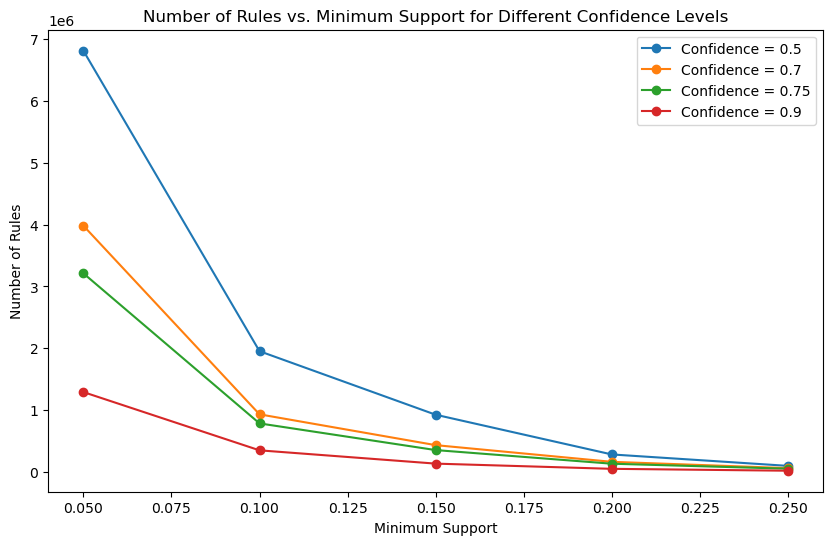

    min_support  min_confidence  num_rules
0          0.05            0.50    6810866
1          0.05            0.70    3982430
2          0.05            0.75    3212286
3          0.05            0.90    1292638
4          0.10            0.50    1953512
5          0.10            0.70     932796
6          0.10            0.75     786234
7          0.10            0.90     350916
8          0.15            0.50     926618
9          0.15            0.70     434869
10         0.15            0.75     355047
11         0.15            0.90     136064
12         0.20            0.50     284472
13         0.20            0.70     165082
14         0.20            0.75     134689
15         0.20            0.90      51942
16         0.25            0.50      99775
17         0.25            0.70      63339
18         0.25            0.75      53664
19         0.25            0.90      21314
Summary DataFrame has been created and saved to 'apriori_results_summary.csv'


In [7]:
# Define ranges for support and confidence thresholds
support_thresholds = [0.05, 0.1, 0.15, 0.2, 0.25]
confidence_thresholds = [0.5, 0.7, 0.75, 0.9]

# # Run experiments
# experiment_results = experiment_with_thresholds(
#     encoded_data, support_thresholds, confidence_thresholds
# )

# Use the function
batch_size = 5000  # Adjust this value based on your available memory
experiment_results = run_apriori_in_batches(
    encoded_data, support_thresholds, confidence_thresholds, batch_size
)

# Create a DataFrame to summarize the results
summary_data = []
# Print results
for result in experiment_results:
    print(
        f"\nMin Support: {result['min_support']}, Min Confidence: {result['min_confidence']}"
    )
    print(f"Number of rules generated: {result['num_rules']}")
    if not result["top_rules"].empty:
        print("Top 5 rules:")
        display(
            result["top_rules"][
                ["antecedents", "consequents", "support", "confidence", "lift"]
            ]
        )
    else:
        print("No rules generated with these thresholds.")
    summary_data.append(
        {
            "min_support": result["min_support"],
            "min_confidence": result["min_confidence"],
            "num_rules": result["num_rules"],
        }
    )

summary_df = pd.DataFrame(summary_data)

# Visualize number of rules for different thresholds
plt.figure(figsize=(10, 6))
for confidence in confidence_thresholds:
    data = summary_df[summary_df["min_confidence"] == confidence]
    plt.plot(
        data["min_support"],
        data["num_rules"],
        marker="o",
        label=f"Confidence = {confidence}",
    )

plt.xlabel("Minimum Support")
plt.ylabel("Number of Rules")
plt.title("Number of Rules vs. Minimum Support for Different Confidence Levels")
plt.legend()
plt.show()

# Print the summary DataFrame
print(summary_df)

# Optionally, save the DataFrame to a CSV file
summary_df.to_csv("apriori_results_summary.csv", index=False)

print("Summary DataFrame has been created and saved to 'apriori_results_summary.csv'")

In [8]:
! pip install networkx


Top 10 rules by lift:
1. M_20th_quantile_binned_M_20th_quantile_Q3, M_mean_binned_M_mean_Q2 -> M_75th_quantile_binned_M_75th_quantile_Q2, M_max_binned_M_max_Q1, Sex_F, M_25th_quantile_binned_M_25th_quantile_Q3
   Support: 0.1047
   Confidence: 1.0000
   Lift: 8.6000
   Conviction: inf
   Leverage: 0.0925
   Support Count: 0

2. M_75th_quantile_binned_M_75th_quantile_Q2, Sex_F, M_20th_quantile_binned_M_20th_quantile_Q3 -> M_mean_binned_M_mean_Q2, M_25th_quantile_binned_M_25th_quantile_Q3
   Support: 0.1047
   Confidence: 0.9000
   Lift: 8.6000
   Conviction: 8.9535
   Leverage: 0.0925
   Support Count: 0

3. M_75th_quantile_binned_M_75th_quantile_Q2, Sex_F, M_25th_quantile_binned_M_25th_quantile_Q3 -> M_20th_quantile_binned_M_20th_quantile_Q3, M_max_binned_M_max_Q1, M_mean_binned_M_mean_Q2
   Support: 0.1047
   Confidence: 0.9000
   Lift: 8.6000
   Conviction: 8.9535
   Leverage: 0.0925
   Support Count: 0

4. M_max_binned_M_max_Q1, M_mean_binned_M_mean_Q2, M_std_binned_M_std_Q1, M_25t

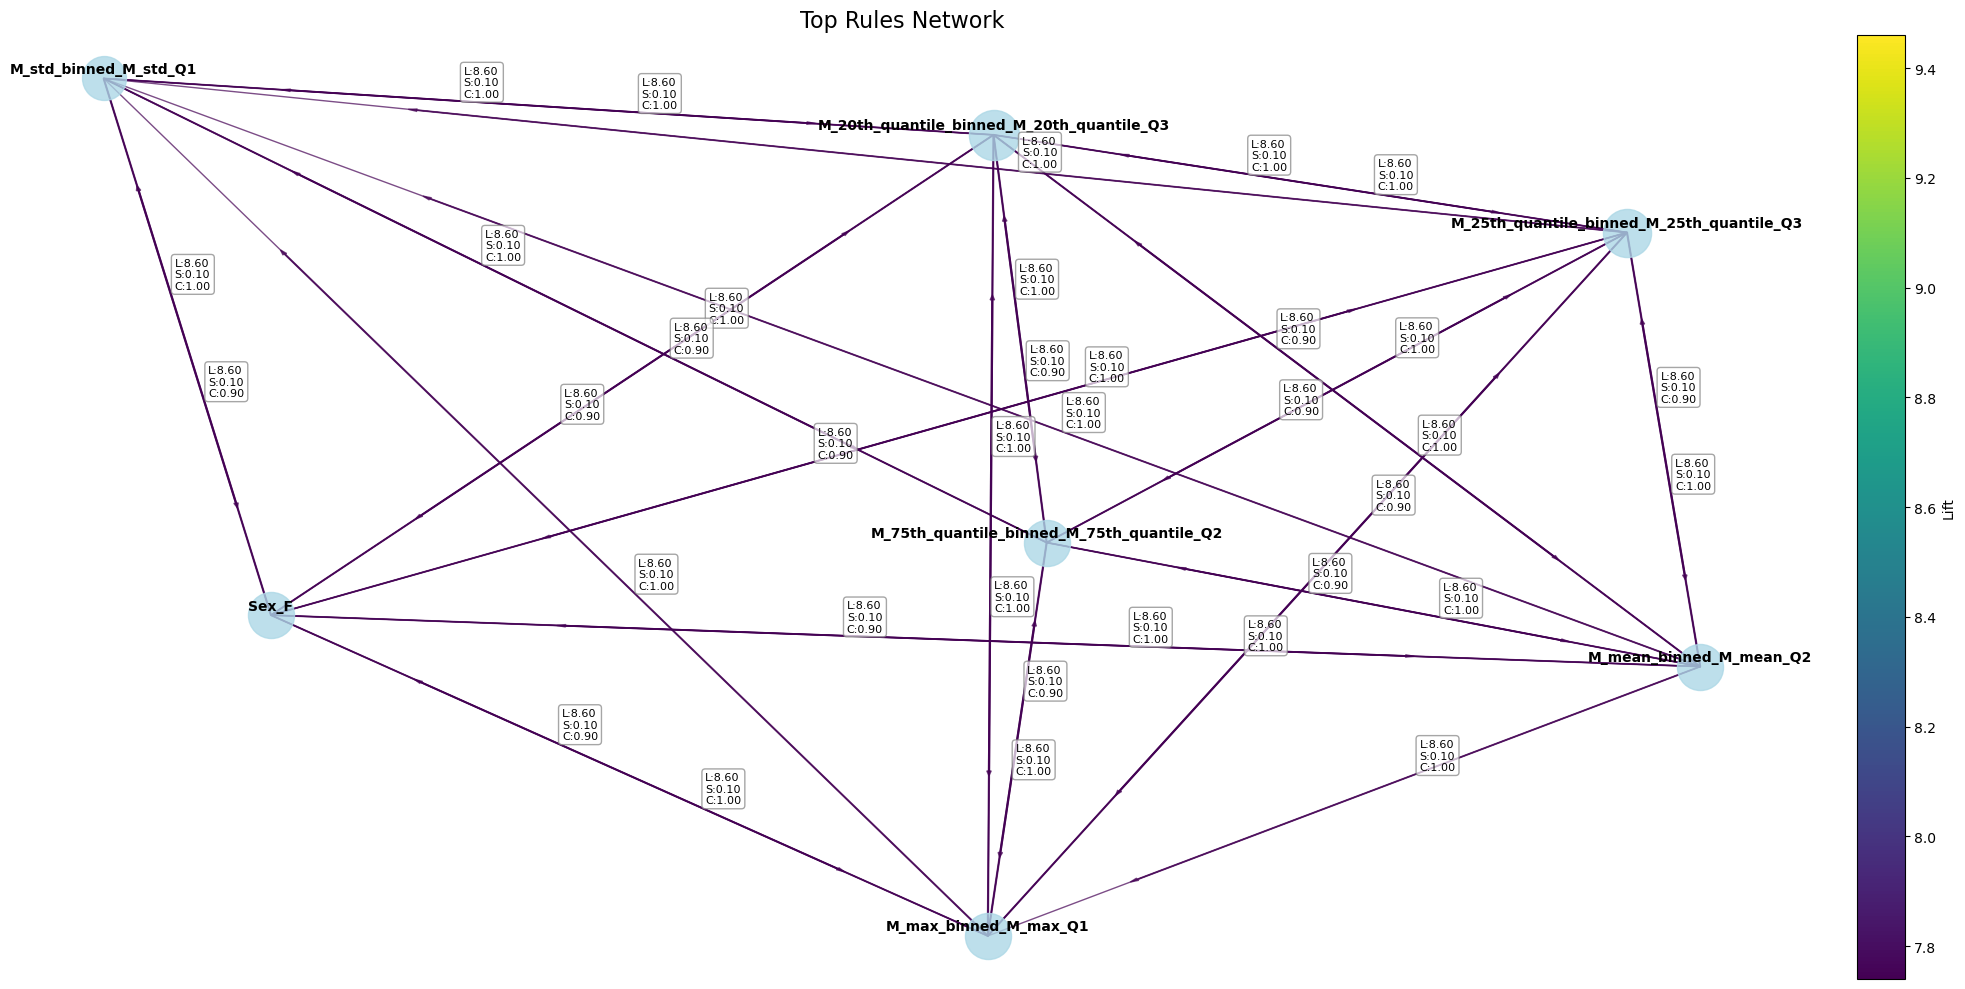


Detailed Rule Information:

Rule 1:
Antecedents: M_20th_quantile_binned_M_20th_quantile_Q3, M_mean_binned_M_mean_Q2
Consequents: M_75th_quantile_binned_M_75th_quantile_Q2, M_max_binned_M_max_Q1, Sex_F, M_25th_quantile_binned_M_25th_quantile_Q3
Support: 0.1047
Confidence: 1.0000
Lift: 8.6000

Rule 2:
Antecedents: M_75th_quantile_binned_M_75th_quantile_Q2, Sex_F, M_20th_quantile_binned_M_20th_quantile_Q3
Consequents: M_mean_binned_M_mean_Q2, M_25th_quantile_binned_M_25th_quantile_Q3
Support: 0.1047
Confidence: 0.9000
Lift: 8.6000

Rule 3:
Antecedents: M_75th_quantile_binned_M_75th_quantile_Q2, Sex_F, M_25th_quantile_binned_M_25th_quantile_Q3
Consequents: M_20th_quantile_binned_M_20th_quantile_Q3, M_max_binned_M_max_Q1, M_mean_binned_M_mean_Q2
Support: 0.1047
Confidence: 0.9000
Lift: 8.6000

Rule 4:
Antecedents: M_max_binned_M_max_Q1, M_mean_binned_M_mean_Q2, M_std_binned_M_std_Q1, M_25th_quantile_binned_M_25th_quantile_Q3
Consequents: M_75th_quantile_binned_M_75th_quantile_Q2, Sex_F, M_

In [10]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib import collections as mc
from mlxtend.preprocessing import TransactionEncoder
from networkx.drawing.nx_agraph import graphviz_layout


def print_detailed_rules(rules, top_n=10):
    print(f"\nTop {top_n} rules by lift:")
    for i, (index, rule) in enumerate(rules.iterrows(), 1):
        if i > top_n:
            break
        antecedents = ", ".join(list(rule["antecedents"]))
        consequents = ", ".join(list(rule["consequents"]))
        print(f"{i}. {antecedents} -> {consequents}")
        print(f"   Support: {rule['support']:.4f}")
        print(f"   Confidence: {rule['confidence']:.4f}")
        print(f"   Lift: {rule['lift']:.4f}")
        print(f"   Conviction: {rule['conviction']:.4f}")
        print(f"   Leverage: {rule['leverage']:.4f}")
        print(f"   Support Count: {int(rule['support'] * len(data))}")
        print()


def visualize_top_rules(
    rules, top_n=10, figure_size=(20, 12), node_size_base=1000, font_size=8
):
    G = nx.DiGraph()
    for i, (index, rule) in enumerate(rules.iterrows()):
        if i >= top_n:
            break
        for antecedent in rule["antecedents"]:
            for consequent in rule["consequents"]:
                G.add_edge(
                    antecedent,
                    consequent,
                    weight=rule["lift"],
                    support=rule["support"],
                    confidence=rule["confidence"],
                )

    pos = nx.spring_layout(G, k=2, iterations=50)

    degrees = dict(G.degree())
    node_sizes = [node_size_base * (1 + degrees[node]) for node in G.nodes()]

    edge_weights = [G[u][v]["weight"] for u, v in G.edges()]
    max_weight, min_weight = max(edge_weights), min(edge_weights)
    norm = mcolors.Normalize(vmin=min_weight, vmax=max_weight)
    edge_colors = plt.cm.viridis(norm(edge_weights))

    # Handle the case where all weights are the same
    if max_weight == min_weight:
        edge_widths = [1 for _ in edge_weights]
    else:
        edge_widths = [
            1 + 2 * (weight - min_weight) / (max_weight - min_weight)
            for weight in edge_weights
        ]

    fig, ax = plt.subplots(figsize=figure_size)

    # Draw edges with curved arrows
    curved_edges = [
        ((x1, y1), (x2, y2))
        for (x1, y1), (x2, y2) in (np.array([pos[u], pos[v]]) for u, v in G.edges())
    ]
    edge_collection = mc.LineCollection(
        curved_edges, colors=edge_colors, linewidths=edge_widths, alpha=0.7, zorder=1
    )
    ax.add_collection(edge_collection)

    # Draw arrow heads
    for (u, v), color, width in zip(G.edges(), edge_colors, edge_widths):
        x1, y1 = pos[u]
        x2, y2 = pos[v]
        dx, dy = x2 - x1, y2 - y1
        ax.arrow(
            x1,
            y1,
            dx * 0.8,
            dy * 0.8,
            color=color,
            width=width * 0.001,
            head_width=width * 0.005,
            head_length=width * 0.01,
            alpha=0.7,
            length_includes_head=True,
            zorder=2,
        )

        # Add edge labels
        edge_label = f"L:{G[u][v]['weight']:.2f}\nS:{G[u][v]['support']:.2f}\nC:{G[u][v]['confidence']:.2f}"
        ax.annotate(
            edge_label,
            xy=(x1 + dx * 0.4, y1 + dy * 0.4),
            xytext=(3, 3),
            textcoords="offset points",
            fontsize=font_size - 2,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.7),
            zorder=5,
        )

    # Draw nodes
    for node, (x, y) in pos.items():
        ax.scatter(
            x,
            y,
            s=node_sizes[list(G.nodes()).index(node)],
            c="lightblue",
            alpha=0.8,
            zorder=3,
        )

    # Draw node labels with adjusted positions
    label_pos = {node: (coord[0], coord[1] + 0.02) for node, coord in pos.items()}
    for node, (x, y) in label_pos.items():
        ax.text(
            x,
            y,
            node,
            fontsize=font_size,
            fontweight="bold",
            ha="center",
            va="center",
            zorder=4,
        )

    # Add a colorbar for edge weights
    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(
        sm, ax=ax, label="Lift", orientation="vertical", fraction=0.046, pad=0.04
    )

    ax.set_title("Top Rules Network", fontsize=16)
    ax.axis("off")
    plt.tight_layout()
    plt.show()

    # Print detailed rule information
    print("\nDetailed Rule Information:")
    for i, (index, rule) in enumerate(rules.iterrows()):
        if i >= top_n:
            break
        print(f"\nRule {i+1}:")
        print(f"Antecedents: {', '.join(rule['antecedents'])}")
        print(f"Consequents: {', '.join(rule['consequents'])}")
        print(f"Support: {rule['support']:.4f}")
        print(f"Confidence: {rule['confidence']:.4f}")
        print(f"Lift: {rule['lift']:.4f}")


def filter_rules_by_item(rules, item, in_antecedents=True, in_consequents=True):
    filtered_rules = rules[
        (rules["antecedents"].apply(lambda x: item in x) if in_antecedents else True)
        | (rules["consequents"].apply(lambda x: item in x) if in_consequents else True)
    ]
    return filtered_rules


# After running the Apriori algorithm
best_rules = run_apriori(encoded_data, min_support=0.1, min_confidence=0.5)

print_detailed_rules(best_rules)

# Example of filtering rules
asthma_related_rules = filter_rules_by_item(best_rules, "BSA_Category_Large")
print("\nRules related to large BSA:")
print_detailed_rules(asthma_related_rules)

# Visualize top rules
visualize_top_rules(
    best_rules, top_n=10, figure_size=(20, 10), node_size_base=100, font_size=10
)

# Print summary statistics
print("\nSummary Statistics:")
print(f"Total number of rules: {len(best_rules)}")
print(f"Average lift: {best_rules['lift'].mean():.4f}")
print(f"Average confidence: {best_rules['confidence'].mean():.4f}")
print(f"Average support: {best_rules['support'].mean():.4f}")